In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
%matplotlib inline

In [2]:
import geopandas as gpd
from shapely.geometry import Point
from bokeh.plotting import figure, output_notebook, show
from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import ColumnDataSource
from ipywidgets import interact

In [3]:
# Notebook Styling 
sns.set()
pd.options.display.max_columns = None
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
global_deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
global_confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
global_recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [5]:
global_deaths_df.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23


In [6]:
global_confirmed_df.tail(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1


In [7]:
global_recovered_df.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,18,29,32,32,32,32,32
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76,89,99,104,116,131,154,165,182,197,217,232


In [8]:
def preprocess_covid_data(df=global_deaths_df):
    df=df.copy()
    df['location'] = df.apply(lambda x: f"{x['Province/State']}, {x['Country/Region']}" if pd.notnull(x['Province/State']) else x['Country/Region'], axis=1)
    locations_df = df[['location', 'Lat', 'Long']].copy()
    df.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1, inplace=True)
    df.set_index('location', inplace=True)
    df.index.name = None
    df = df.T
    df.reset_index(inplace=True)
    df.rename({'index':'date'}, axis=1, inplace=True)
    date_len = len(df.loc[0:0, 'date'][0])
    if date_len <= 7:
        df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
    else:
        df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
    return (locations_df, df)                            

In [9]:
death_locations, deaths_df = preprocess_covid_data(df=global_deaths_df)
confirmed_locations, confirmed_df = preprocess_covid_data(df=global_confirmed_df)
recovered_locations, recovered_df = preprocess_covid_data(df=global_recovered_df)

In [10]:
deaths_df.tail(3)

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,"Australian Capital Territory, Australia","New South Wales, Australia","Northern Territory, Australia","Queensland, Australia","South Australia, Australia","Tasmania, Australia","Victoria, Australia","Western Australia, Australia",Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,"Alberta, Canada","British Columbia, Canada","Grand Princess, Canada","Manitoba, Canada","New Brunswick, Canada","Newfoundland and Labrador, Canada","Nova Scotia, Canada","Ontario, Canada","Prince Edward Island, Canada","Quebec, Canada","Saskatchewan, Canada",Central African Republic,Chad,Chile,"Anhui, China","Beijing, China","Chongqing, China","Fujian, China","Gansu, China","Guangdong, China","Guangxi, China","Guizhou, China","Hainan, China","Hebei, China","Heilongjiang, China","Henan, China","Hong Kong, China","Hubei, China","Hunan, China","Inner Mongolia, China","Jiangsu, China","Jiangxi, China","Jilin, China","Liaoning, China","Macau, China","Ningxia, China","Qinghai, China","Shaanxi, China","Shandong, China","Shanghai, China","Shanxi, China","Sichuan, China","Tianjin, China","Tibet, China","Xinjiang, China","Yunnan, China","Zhejiang, China",Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Diamond Princess,Cuba,Cyprus,Czechia,"Faroe Islands, Denmark","Greenland, Denmark",Denmark,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,"French Guiana, France","French Polynesia, France","Guadeloupe, France","Mayotte, France","New Caledonia, France","Reunion, France","Saint Barthelemy, France","St Martin, France","Martinique, France",France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kuwait,Kyrgyzstan,Latvia,Lebanon,Liberia,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malaysia,Maldives,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Namibia,Nepal,"Aruba, Netherlands","Curacao, Netherlands","Sint Maarten, Netherlands",Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan*,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,"Bermuda, United Kingdom","Cayman Islands, United Kingdom","Channel Islands, United Kingdom","Gibraltar, United Kingdom","Isle of Man, United Kingdom","Montserrat, United Kingdom",United Kingdom,Uruguay,US,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,"Diamond Princess, Canada",Dominica,Grenada,Mozambique,Syria,Timor-Leste,Belize,"Recovered, Canada",Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,"Northwest Territories, Canada","Yukon, Canada",Kosovo,Burma,"Anguilla, United Kingdom","British Virgin Islands, United Kingdom","Turks and Caicos Islands, United Kingdom",MS Zaandam,Botswana,Burundi,Sierra Leone,"Bonaire, Sint Eustatius and Saba, Netherlands",Malawi,"Falkland Islands (Malvinas), United Kingdom","Saint Pierre and Miquelon, France",South Sudan,Western Sahara,Sao Tome and Principe,Yemen
80,2020-04-11,18,23,275,26,2,2,83,13,2,23,0,5,3,4,14,6,337,11,8,6,30,4,23,3346,1,0,20,37,1124,1,28,27,1,0,12,40,58,0,4,0,3,2,253,0,289,4,0,0,73,6,8,6,1,2,8,2,2,6,6,13,22,4,3219,4,1,0,1,1,2,0,0,0,3,7,7,0,3,3,0,3,2,1,100,5,20,3,4,21,11,16,10,129,0,0,260,2,135,315,146,6,0,0,24,0,3,0,49,0,0,8,3,0,0,0,2,6,13832,1,1,3,2736,8,93,3,0,6,2,0,24,85,8,288,327,4357,72,320,101,19468,

In [11]:
confirmed_df.tail(3)

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,"Australian Capital Territory, Australia","New South Wales, Australia","Northern Territory, Australia","Queensland, Australia","South Australia, Australia","Tasmania, Australia","Victoria, Australia","Western Australia, Australia",Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,"Alberta, Canada","British Columbia, Canada","Grand Princess, Canada","Manitoba, Canada","New Brunswick, Canada","Newfoundland and Labrador, Canada","Nova Scotia, Canada","Ontario, Canada","Prince Edward Island, Canada","Quebec, Canada","Saskatchewan, Canada",Central African Republic,Chad,Chile,"Anhui, China","Beijing, China","Chongqing, China","Fujian, China","Gansu, China","Guangdong, China","Guangxi, China","Guizhou, China","Hainan, China","Hebei, China","Heilongjiang, China","Henan, China","Hong Kong, China","Hubei, China","Hunan, China","Inner Mongolia, China","Jiangsu, China","Jiangxi, China","Jilin, China","Liaoning, China","Macau, China","Ningxia, China","Qinghai, China","Shaanxi, China","Shandong, China","Shanghai, China","Shanxi, China","Sichuan, China","Tianjin, China","Tibet, China","Xinjiang, China","Yunnan, China","Zhejiang, China",Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Diamond Princess,Cuba,Cyprus,Czechia,"Faroe Islands, Denmark","Greenland, Denmark",Denmark,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,"French Guiana, France","French Polynesia, France","Guadeloupe, France","Mayotte, France","New Caledonia, France","Reunion, France","Saint Barthelemy, France","St Martin, France","Martinique, France",France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kuwait,Kyrgyzstan,Latvia,Lebanon,Liberia,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malaysia,Maldives,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Namibia,Nepal,"Aruba, Netherlands","Curacao, Netherlands","Sint Maarten, Netherlands",Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan*,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,"Bermuda, United Kingdom","Cayman Islands, United Kingdom","Channel Islands, United Kingdom","Gibraltar, United Kingdom","Isle of Man, United Kingdom","Montserrat, United Kingdom",United Kingdom,Uruguay,US,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,"Diamond Princess, Canada",Dominica,Grenada,Mozambique,Syria,Timor-Leste,Belize,"Recovered, Canada",Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,"Northwest Territories, Canada","Yukon, Canada",Kosovo,Burma,"Anguilla, United Kingdom","British Virgin Islands, United Kingdom","Turks and Caicos Islands, United Kingdom",MS Zaandam,Botswana,Burundi,Sierra Leone,"Bonaire, Sint Eustatius and Saba, Netherlands",Malawi,"Falkland Islands (Malvinas), United Kingdom","Saint Pierre and Miquelon, France",South Sudan,Western Sahara,Sao Tome and Principe,Yemen
80,2020-04-11,555,433,1825,601,19,21,1975,967,103,2857,28,974,429,133,1265,514,13806,1058,46,1040,482,68,2226,28018,35,5,275,946,20727,136,661,484,8,120,820,1567,1445,13,243,112,241,428,6648,25,12292,289,8,11,6927,991,589,579,351,139,1548,254,146,168,327,661,1276,1000,67803,1019,155,652,937,98,145,45,75,18,256,784,555,172,560,183,1,76,184,1267,2709,60,223,577,533,1534,7

In [12]:
recovered_df.tail(3)

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,"Australian Capital Territory, Australia","New South Wales, Australia","Northern Territory, Australia","Queensland, Australia","South Australia, Australia","Tasmania, Australia","Victoria, Australia","Western Australia, Australia",Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,"Anhui, China","Beijing, China","Chongqing, China","Fujian, China","Gansu, China","Guangdong, China","Guangxi, China","Guizhou, China","Hainan, China","Hebei, China","Heilongjiang, China","Henan, China","Hong Kong, China","Hubei, China","Hunan, China","Inner Mongolia, China","Jiangsu, China","Jiangxi, China","Jilin, China","Liaoning, China","Macau, China","Ningxia, China","Qinghai, China","Shaanxi, China","Shandong, China","Shanghai, China","Shanxi, China","Sichuan, China","Tianjin, China","Tibet, China","Xinjiang, China","Yunnan, China","Zhejiang, China",Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Diamond Princess,Cuba,Cyprus,Czechia,"Faroe Islands, Denmark","Greenland, Denmark",Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,"French Guiana, France","French Polynesia, France","Guadeloupe, France","Martinique, France","Mayotte, France","New Caledonia, France","Reunion, France","Saint Barthelemy, France","St Martin, France",France,Gabon,Gambia,Georgia,Germany,Ghana,Grenada,Greece,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kuwait,Kyrgyzstan,Latvia,Lebanon,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Namibia,Nepal,"Aruba, Netherlands","Curacao, Netherlands","Sint Maarten, Netherlands",Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,"Bermuda, United Kingdom","Cayman Islands, United Kingdom","Channel Islands, United Kingdom","Gibraltar, United Kingdom","Isle of Man, United Kingdom","Montserrat, United Kingdom",United Kingdom,Uruguay,US,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,West Bank and Gaza,Laos,Kosovo,Burma,"Anguilla, United Kingdom","British Virgin Islands, United Kingdom","Turks and Caicos Islands, United Kingdom",MS Zaandam,Botswana,Burundi,Sierra Leone,"Bonaire, Sint Eustatius and Saba, Netherlands",Malawi,"Falkland Islands (Malvinas), United Kingdom","Saint Pierre and Miquelon, France",South Sudan,Western Sahara,Sao Tome and Principe,Yemen
80,2020-04-11,32,197,460,71,4,0,440,173,59,4,2,372,179,48,926,216,6604,200,5,555,36,11,172,5986,0,5,2,2,139,173,104,62,155,1,75,98,6589,0,2,1864,984,474,570,317,135,1437,252,144,162,313,470,1252,336,64264,1014,79,636,936,96,133,10,75,18,248,757,438,135,547,161,1,73,174,1236,214,5,16,49,58,323,619,77,61,411,145,11,1955,36,5,108,411,426,19,3,0,93,7,10,0,300,43,0,67,50,59,1,40,1,11,26391,1,2,60,57400,4,0,269,19,17,0,8,0,2,7,115,841,969,286,41947,601,25,1341,32534,13,762,177,81,24,7243,133,44,16,77,3,8,55,54,500,11,1995,13,22,16,2,28,633,75,5,4,5,146,2,3,1,29,7,5,250,422,0,41,70,41,32,109,762,17,0,18,1739,157,375,266,247,758,1045,18,0,1,1,53,720,152,0,0,528,23,148,1,410,59109,54,2,4,381,12100,5,99,5,1135,1,25,12,43

In [13]:
top_deaths = deaths_df.loc[:, deaths_df.columns != 'date'].tail(1).T
top_deaths.rename({top_deaths.columns[0]:'total'}, axis=1, inplace=True)
top_deaths.sort_values(by='total', ascending=False, inplace=True)
top_deaths.head(20)

,total
US,23529
Italy,20465
Spain,17756
France,14967
United Kingdom,11329
Iran,4585
Belgium,3903
"Hubei, China",3221
Germany,3194
Netherlands,2823


In [16]:
def plot_covid_19_data(location=None, case_type='Confirmed', y_type='log'):
    if case_type.lower() == 'fatal':
        df = deaths_df
    elif case_type.lower() == 'recovered':
        df = recovered_df
    else:
        df = confirmed_df
    
    nonzero_df = [False]
    nonzero_df.extend((df.sum(axis=0) > 0).tolist())
    nonzero_cols = ['date']
    nonzero_cols.extend(df.columns[nonzero_df])
    df = df[nonzero_cols].copy()

    
    if (location is None) and ('Cook County, IL, US' in list(df.columns)):
        location='Cook County, IL, US'
    else:
        location='US'
    
    cols = list(df.columns)
    cols.sort()
    locations = [col for col in cols if col != 'date']
    source = ColumnDataSource(df)
    date = source.data['date']
    location_data = source.data[location]
    plot = figure(x_axis_type='datetime', x_axis_label='Date', y_axis_label=f"{case_type} COVID-19 Cases", 
                  y_axis_type=y_type, title=f"{case_type} Cases of COVID-19 in {location}", plot_width=800, plot_height=500)
    line = plot.line(date, location_data)
        
    plot.title.text_font_size='18pt'
    plot.xaxis.axis_label_text_font_size = "16pt"
    plot.yaxis.axis_label_text_font_size = "16pt"
    
    plot.xaxis.axis_label_text_font_style = 'normal'
    plot.yaxis.axis_label_text_font_style = 'normal'
    
    plot.ygrid.minor_grid_line_color = 'black'
    plot.ygrid.minor_grid_line_alpha = 0.1
    
    output_notebook() 
    _ = show(plot, notebook_handle=True) 
    
    def update_covid_19_plot(location=location):
        plot.title.text = f"{case_type} Cases of COVID-19 in {location}"
        line.data_source.data['y'] = source.data[location]
        push_notebook()
    
    interact(update_covid_19_plot, location=locations)
       

In [17]:
plot_covid_19_data(case_type='Confirmed')

Loading BokehJS ...

interactive(children=(Dropdown(description='location', index=242, options=('Afghanistan', 'Albania', 'Alberta,…

In [18]:
plot_covid_19_data(case_type='Confirmed', y_type='linear')

Loading BokehJS ...

interactive(children=(Dropdown(description='location', index=242, options=('Afghanistan', 'Albania', 'Alberta,…

In [19]:
plot_covid_19_data(case_type='Fatal')

Loading BokehJS ...

interactive(children=(Dropdown(description='location', index=188, options=('Afghanistan', 'Albania', 'Alberta,…

In [20]:
plot_covid_19_data(case_type='Recovered')

Loading BokehJS ...

interactive(children=(Dropdown(description='location', index=210, options=('Afghanistan', 'Albania', 'Algeria'…

In [21]:
def plot_covid_19_data_mpl(case_type='Fatal', locations=['Italy', 'Hubei, China'], y_type='log', figsize=(12,8), y_scale_base=2):
    if case_type.lower() == 'confirmed':
        df = confirmed_df
    elif case_type.lower() == 'recovered':
        df = recovered_df
    else:
        df = deaths_df
        
    fig, ax = plt.subplots(figsize=figsize)
    for location in locations:
        ax = df.plot(x='date', y=location, ax=ax, linewidth=3)
    ax.set_yscale(y_type, basey=y_scale_base)
    ax.grid(b=True, which='both', axis='y')
    
    ax.set_title(f"{case_type} COVID-19 Cases", fontsize=18)
    ax.set_ylabel(f"Number of {case_type} COVID-19 Cases", fontsize=16)
    ax.set_xlabel('Date', fontsize=16)
    ax.legend(fontsize=16)
    ax.tick_params(which='both', labelsize=14)
    
    plt.tight_layout()

In [22]:
top_deaths = deaths_df.loc[:, deaths_df.columns != 'date'].tail(1).T
top_deaths.rename({top_deaths.columns[0]:'total'}, axis=1, inplace=True)
top_deaths.sort_values(by='total', ascending=False, inplace=True)
top_deaths.head(20)

,total
US,23529
Italy,20465
Spain,17756
France,14967
United Kingdom,11329
Iran,4585
Belgium,3903
"Hubei, China",3221
Germany,3194
Netherlands,2823


In [23]:
deaths_df.head(2)

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,"Australian Capital Territory, Australia","New South Wales, Australia","Northern Territory, Australia","Queensland, Australia","South Australia, Australia","Tasmania, Australia","Victoria, Australia","Western Australia, Australia",Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,"Alberta, Canada","British Columbia, Canada","Grand Princess, Canada","Manitoba, Canada","New Brunswick, Canada","Newfoundland and Labrador, Canada","Nova Scotia, Canada","Ontario, Canada","Prince Edward Island, Canada","Quebec, Canada","Saskatchewan, Canada",Central African Republic,Chad,Chile,"Anhui, China","Beijing, China","Chongqing, China","Fujian, China","Gansu, China","Guangdong, China","Guangxi, China","Guizhou, China","Hainan, China","Hebei, China","Heilongjiang, China","Henan, China","Hong Kong, China","Hubei, China","Hunan, China","Inner Mongolia, China","Jiangsu, China","Jiangxi, China","Jilin, China","Liaoning, China","Macau, China","Ningxia, China","Qinghai, China","Shaanxi, China","Shandong, China","Shanghai, China","Shanxi, China","Sichuan, China","Tianjin, China","Tibet, China","Xinjiang, China","Yunnan, China","Zhejiang, China",Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Diamond Princess,Cuba,Cyprus,Czechia,"Faroe Islands, Denmark","Greenland, Denmark",Denmark,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,"French Guiana, France","French Polynesia, France","Guadeloupe, France","Mayotte, France","New Caledonia, France","Reunion, France","Saint Barthelemy, France","St Martin, France","Martinique, France",France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kuwait,Kyrgyzstan,Latvia,Lebanon,Liberia,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malaysia,Maldives,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Namibia,Nepal,"Aruba, Netherlands","Curacao, Netherlands","Sint Maarten, Netherlands",Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan*,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,"Bermuda, United Kingdom","Cayman Islands, United Kingdom","Channel Islands, United Kingdom","Gibraltar, United Kingdom","Isle of Man, United Kingdom","Montserrat, United Kingdom",United Kingdom,Uruguay,US,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,"Diamond Princess, Canada",Dominica,Grenada,Mozambique,Syria,Timor-Leste,Belize,"Recovered, Canada",Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,"Northwest Territories, Canada","Yukon, Canada",Kosovo,Burma,"Anguilla, United Kingdom","British Virgin Islands, United Kingdom","Turks and Caicos Islands, United Kingdom",MS Zaandam,Botswana,Burundi,Sierra Leone,"Bonaire, Sint Eustatius and Saba, Netherlands",Malawi,"Falkland Islands (Malvinas), United Kingdom","Saint Pierre and Miquelon, France",South Sudan,Western Sahara,Sao Tome and Principe,Yemen
0,2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

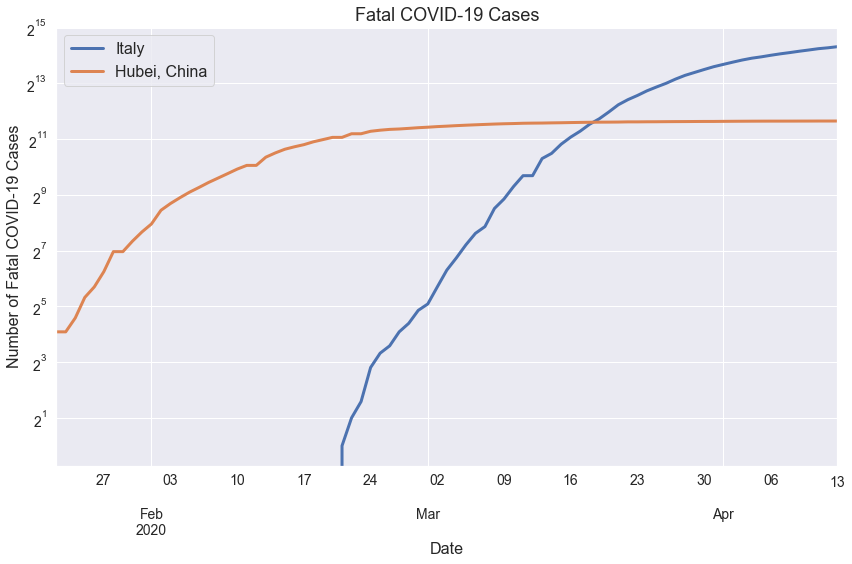

In [24]:
plot_covid_19_data_mpl(case_type='Fatal', locations=['Italy', 'Hubei, China'])

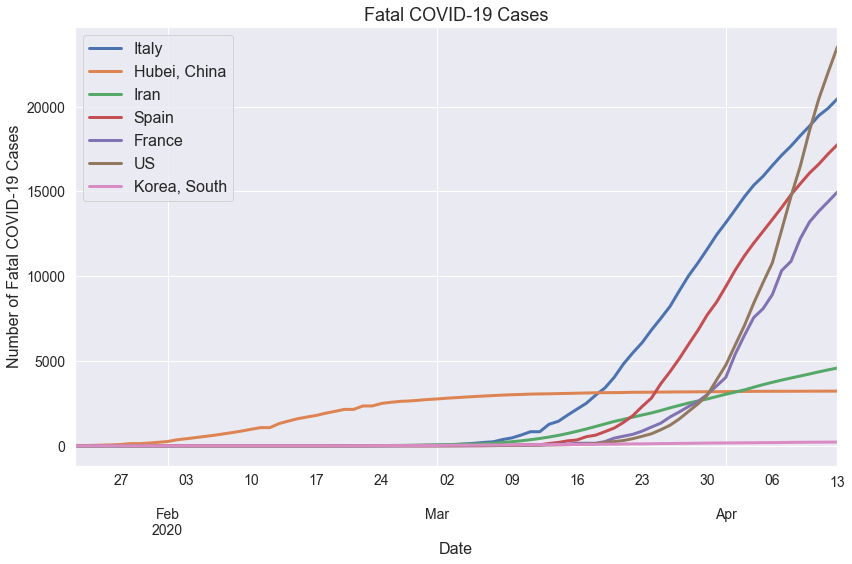

In [25]:
plot_covid_19_data_mpl(case_type='Fatal', locations=['Italy', 'Hubei, China', 'Iran', 'Spain', 'France', 'US', 'Korea, South'], y_type='linear')

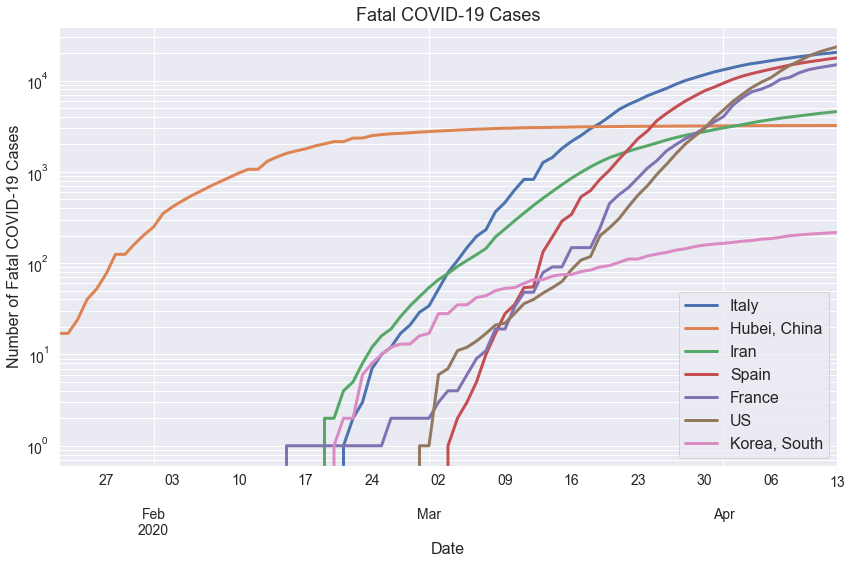

In [26]:
plot_covid_19_data_mpl(case_type='Fatal', locations=['Italy', 'Hubei, China', 'Iran', 'Spain', 'France', 'US', 'Korea, South'], y_type='log', y_scale_base=10)

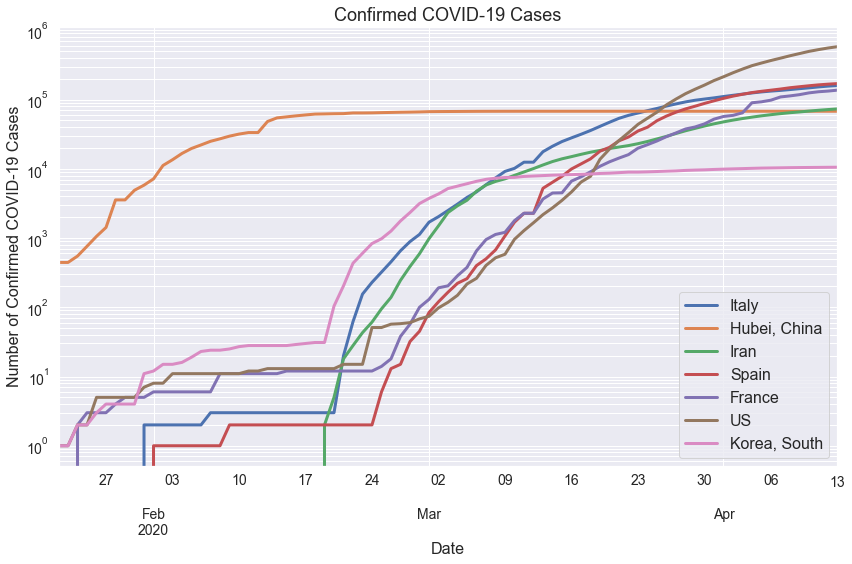

In [27]:
plot_covid_19_data_mpl(case_type='Confirmed', locations=['Italy', 'Hubei, China', 'Iran', 'Spain', 'France', 'US', 'Korea, South'], y_type='log', y_scale_base=10)

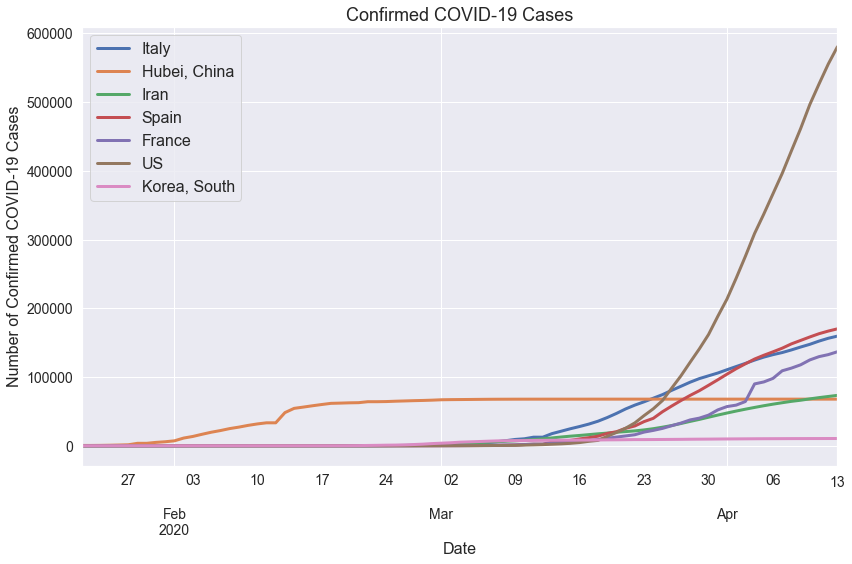

In [28]:
plot_covid_19_data_mpl(case_type='Confirmed', locations=['Italy', 'Hubei, China', 'Iran', 'Spain', 'France', 'US', 'Korea, South'], y_type='linear', y_scale_base=10)

In [304]:
# Plotting in log_base_2 scale
# plot_covid_19_data_mpl(case_type='Fatal', locations=['Italy', 'Hubei, China', 'Iran', 'Spain', 'France', 'US', 'Korea, South'], y_type='log', y_scale_base=2)

# Days since X [cases, deaths, recoveries] Plots

In [47]:
def plot_days_past_threshold(case_type='Fatal', thresh=100, total_thresh=1000, y_type='log', 
                             y_scale_base=10, locations=None, figsize=(12,8)):
    
    if case_type == 'Confirmed':
        df=get_days_since_threshold_df(df=confirmed_df, thresh=thresh)
    elif case_type == 'Recovered':
        df=get_days_since_threshold_df(df=recovered_df, thresh=thresh)
    else:
        df=get_days_since_threshold_df(df=deaths_df, thresh=thresh)
    max_total = 0
    max_days = 0
    
    if locations is None:
        locations = [col.split('_')[0] for col in days_since_100_deaths_df.columns if '_' in col]
    
    fig, ax = plt.subplots(figsize=figsize)
    for country in locations:
        if df[country].max() >= total_thresh:
            ax = df.plot(x=f"{country}_days_past", y=country, ax=ax, linewidth=3)
            if df[country].max() >= max_total:
                max_total = df[country].max()
                max_days = df[f"{country}_days_past"].max()
                
    ax.set_title(f"Days past {thresh} {case_type} Cases for countries with at least {total_thresh} {case_type} Cases", fontsize=18)
    ax.set_yscale(y_type, basey=y_scale_base)
    ax.grid(b=True, which='both', axis='y')
    ax.set_xlim([-1, max_days + 2])
    ax.set_ylim([0.7*thresh, max_total*1.1])
    ax.set_xlabel(f"Days past {thresh} {case_type} Cases", fontsize=16)
    ax.legend(fontsize=16)
    ax.tick_params(which='both', labelsize=14)

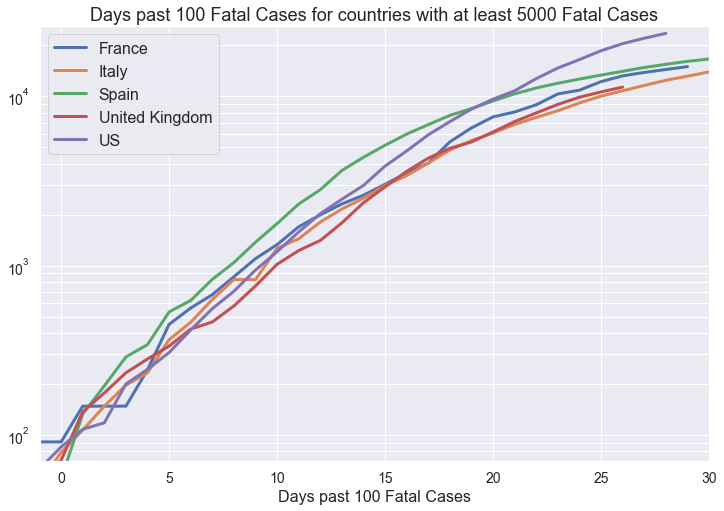

In [49]:
plot_days_past_threshold(case_type='Fatal', thresh=100, total_thresh=5000, y_type='log', 
                             y_scale_base=10, locations=None, figsize=(12,8))

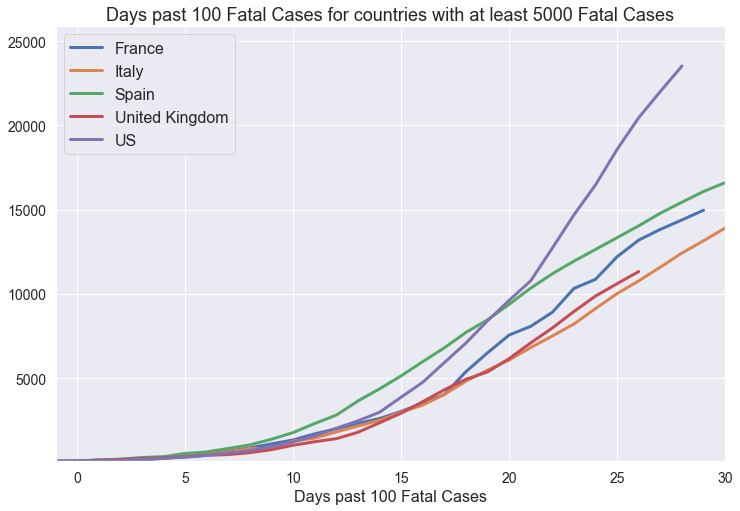

In [50]:
plot_days_past_threshold(case_type='Fatal', thresh=100, total_thresh=5000, y_type='linear', 
                             y_scale_base=10, locations=None, figsize=(12,8))

# Maps

In [64]:
today = pd.to_datetime('today')
today_str = today.date().strftime('%m-%d-%Y')
yesterday = today - pd.Timedelta('1 days')
yesterday_str = yesterday.date().strftime('%m-%d-%Y')
dtypes = {'FIPS':'object'}

try:
    world_covid_df = pd.read_csv(f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{today_str}.csv', dtype=dtypes)
except:
    world_covid_df = pd.read_csv(f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{yesterday_str}.csv', dtype=dtypes)
    
world_covid_df['geometry'] = world_covid_df.apply(lambda x: Point(x['Long_'], x['Lat']), axis=1)
world_covid_df = gpd.GeoDataFrame(world_covid_df)

In [65]:
world_covid_df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,geometry
0,45001,Abbeville,South Carolina,US,2020-04-13 23:07:54,34.223334,-82.461707,9,0,0,9,"Abbeville, South Carolina, US",POINT (-82.46171 34.22333)
1,22001,Acadia,Louisiana,US,2020-04-13 23:07:54,30.295065,-92.414197,101,5,0,96,"Acadia, Louisiana, US",POINT (-92.41420 30.29506)
2,51001,Accomack,Virginia,US,2020-04-13 23:07:54,37.767072,-75.632346,15,0,0,15,"Accomack, Virginia, US",POINT (-75.63235 37.76707)
3,16001,Ada,Idaho,US,2020-04-13 23:07:54,43.452658,-116.241552,517,6,0,511,"Ada, Idaho, US",POINT (-116.24155 43.45266)
4,19001,Adair,Iowa,US,2020-04-13 23:07:54,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US",POINT (-94.47106 41.33076)


In [66]:
world_covid_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3002 entries, 0 to 3001
Data columns (total 13 columns):
FIPS              2722 non-null object
Admin2            2733 non-null object
Province_State    2821 non-null object
Country_Region    3002 non-null object
Last_Update       3002 non-null object
Lat               2943 non-null float64
Long_             2943 non-null float64
Confirmed         3002 non-null int64
Deaths            3002 non-null int64
Recovered         3002 non-null int64
Active            3002 non-null int64
Combined_Key      3002 non-null object
geometry          3002 non-null geometry
dtypes: float64(2), geometry(1), int64(4), object(6)
memory usage: 305.0+ KB


In [67]:
world_covid_df.loc[world_covid_df['Country_Region'] == 'US'].sort_values(by=['Confirmed'], ascending=[False]).head(20)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,geometry
1761,36061,New York City,New York,US,2020-04-13 23:07:54,40.767273,-73.971526,106763,7349,0,99414,"New York City, New York, US",POINT (-73.97153 40.76727)
1743,36059,Nassau,New York,US,2020-04-13 23:07:54,40.740665,-73.589419,24358,910,0,23448,"Nassau, New York, US",POINT (-73.58942 40.74067)
2319,36103,Suffolk,New York,US,2020-04-13 23:07:54,40.883201,-72.801217,21643,568,0,21075,"Suffolk, New York, US",POINT (-72.80122 40.88320)
2631,36119,Westchester,New York,US,2020-04-13 23:07:54,41.162784,-73.757417,19786,557,0,19229,"Westchester, New York, US",POINT (-73.75742 41.16278)
544,17031,Cook,Illinois,US,2020-04-13 23:07:54,41.841448,-87.816588,15474,543,0,14931,"Cook, Illinois, US",POINT (-87.81659 41.84145)
2606,26163,Wayne,Michigan,US,2020-04-13 23:07:54,42.278056,-83.378611,11648,760,0,10888,"Wayne, Michigan, US",POINT (-83.37861 42.27806)
163,34003,Bergen,New Jersey,US,2020-04-13 23:07:54,40.960109,-74.071643,10092,482,0,9610,"Bergen, New Jersey, US",POINT (-74.07164 40.96011)
1452,6037,Los Angeles,California,US,2020-04-13 23:07:54,34.308284,-118.228241,9433,322,0,9111,"Los Angeles, California, US",POINT (-118.22824 34.30828)
2099,36087,Rockland,New York,US,2020-04-13 23:07:54,41.150279,-74.025605,7965,241,0,7724,"Rockland, New York, US",POINT (-74.02560 41.15028)
1109,34017,Hudson,New Jersey,US,2020-04-13 23:07:54,40.737662,-74.075157,7879,236,0,7643,"Hudson, New Jersey, US",POINT (-74.07516 40.73766)


In [233]:
world_covid_df.crs

In [234]:
world_gdf.crs

{'init': 'epsg:4326'}

In [68]:
WORLD_SHAPEFILE = os.path.join('zip://', 'shapefiles', 'ne_50m_admin_0_countries_lakes.zip')
world_gdf = gpd.read_file(WORLD_SHAPEFILE)

In [69]:
world_gdf.crs

{'init': 'epsg:4326'}

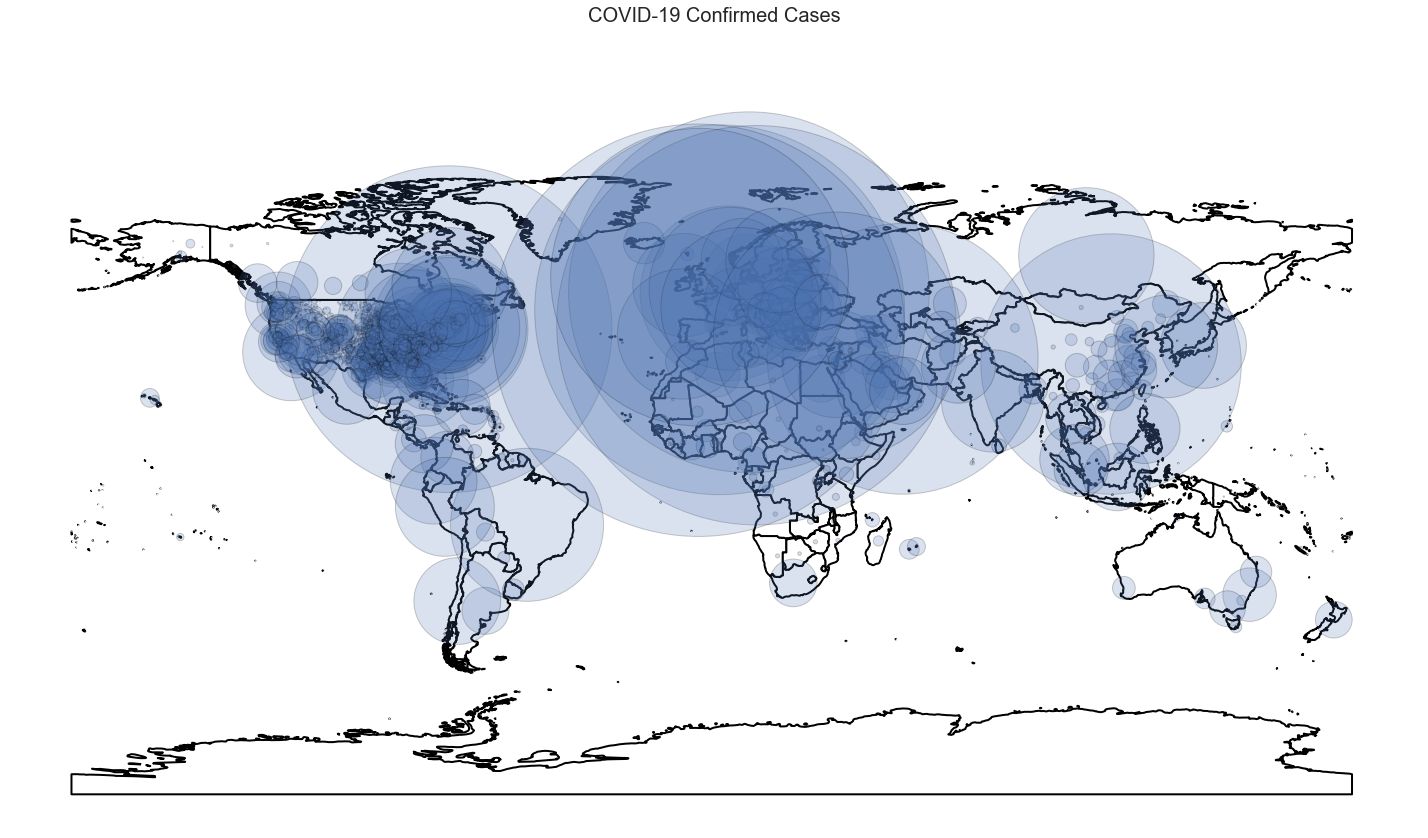

In [72]:
figsize=(20,15)
fig, ax = plt.subplots(figsize=figsize)
base = world_gdf.plot(figsize=figsize, color='white', edgecolor='black', linewidth=2, ax=ax)
ax = world_covid_df.plot(markersize=world_covid_df['Confirmed'], edgecolor='black', alpha=0.2, ax=ax)
_ = ax.axis('off')
ax.set_title('COVID-19 Confirmed Cases', fontsize=20)
plt.tight_layout()

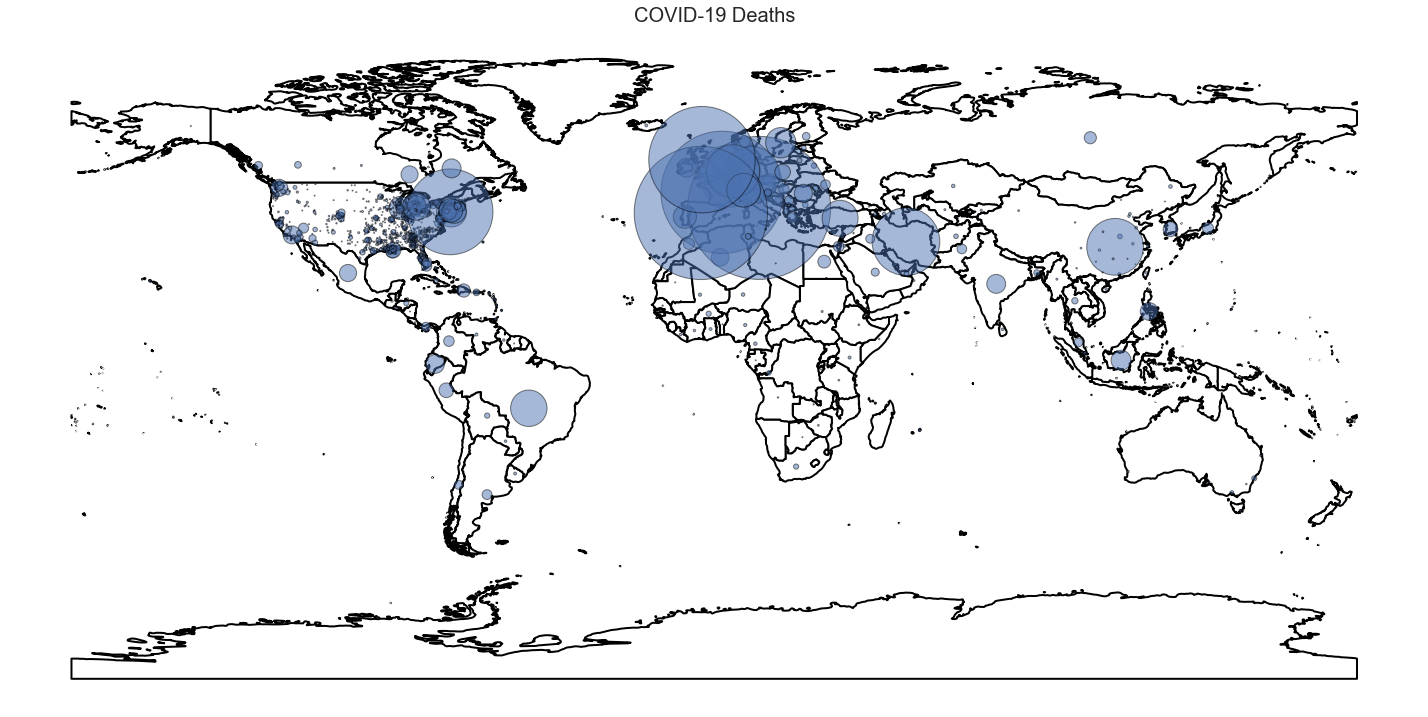

In [75]:
figsize=(20,15)
fig, ax = plt.subplots(figsize=figsize)
base = world_gdf.plot(figsize=figsize, color='white', edgecolor='black', linewidth=2, ax=ax)
ax = world_covid_df.plot(markersize=world_covid_df['Deaths'], edgecolor='black', alpha=0.5, ax=ax)
_ = ax.axis('off')
ax.set_title('COVID-19 Deaths', fontsize=20)
plt.tight_layout()

In [76]:
world_covid_df.head(2)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,geometry
0,45001,Abbeville,South Carolina,US,2020-04-13 23:07:54,34.223334,-82.461707,9,0,0,9,"Abbeville, South Carolina, US",POINT (-82.46171 34.22333)
1,22001,Acadia,Louisiana,US,2020-04-13 23:07:54,30.295065,-92.414197,101,5,0,96,"Acadia, Louisiana, US",POINT (-92.41420 30.29506)


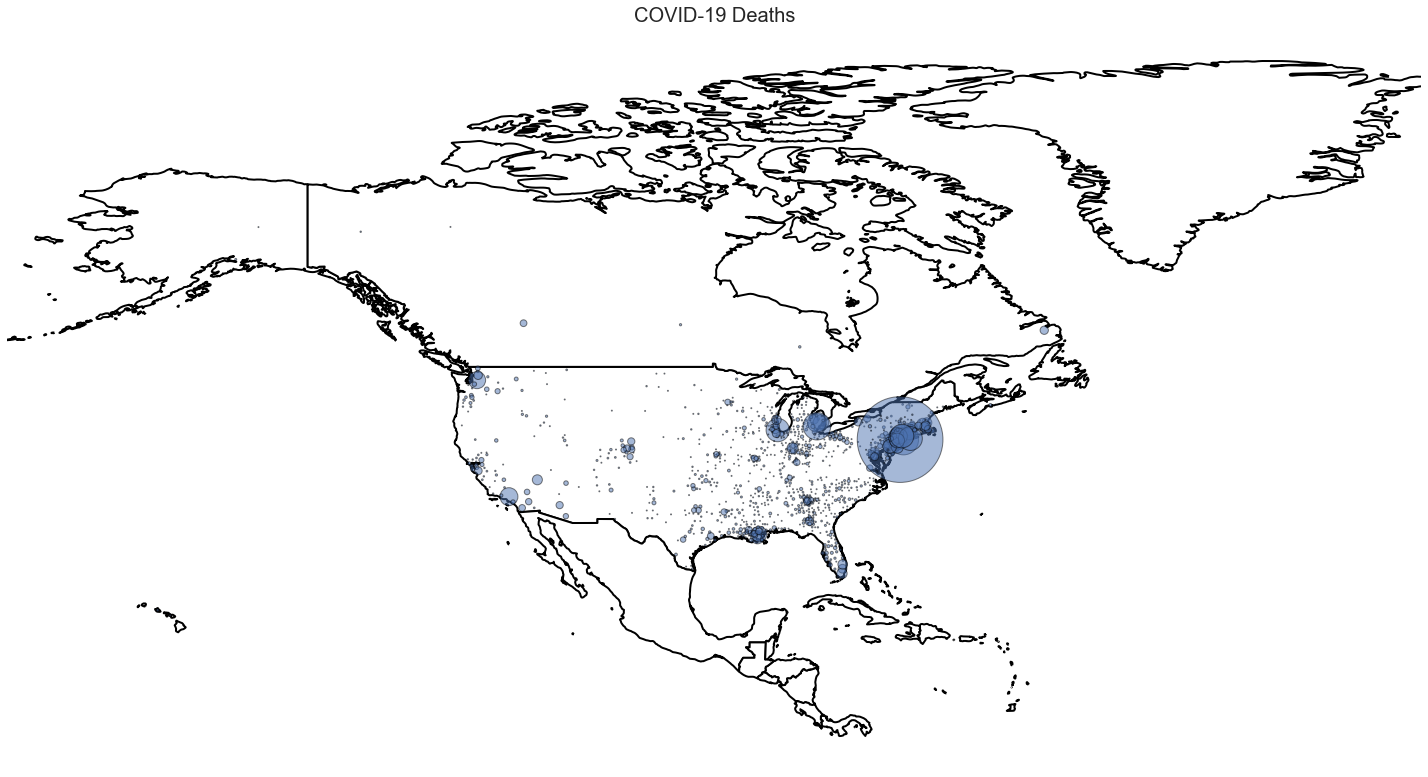

In [78]:
figsize=(20,20)
fig, ax = plt.subplots(figsize=figsize)
base = world_gdf.loc[world_gdf['CONTINENT'] == 'North America'].plot(figsize=figsize, color='white', edgecolor='black', linewidth=2, ax=ax)
ax = world_covid_df.loc[world_covid_df['Country_Region'].isin(['US', 'Canada', 'Mexico'])].plot(markersize=world_covid_df['Deaths'], edgecolor='black', alpha=0.5, ax=ax)
_ = ax.axis('off')
ax.set_title('COVID-19 Deaths', fontsize=20)
min_lon=-175; max_lon=-15
ax.set_xlim([min_lon, max_lon])
plt.tight_layout()

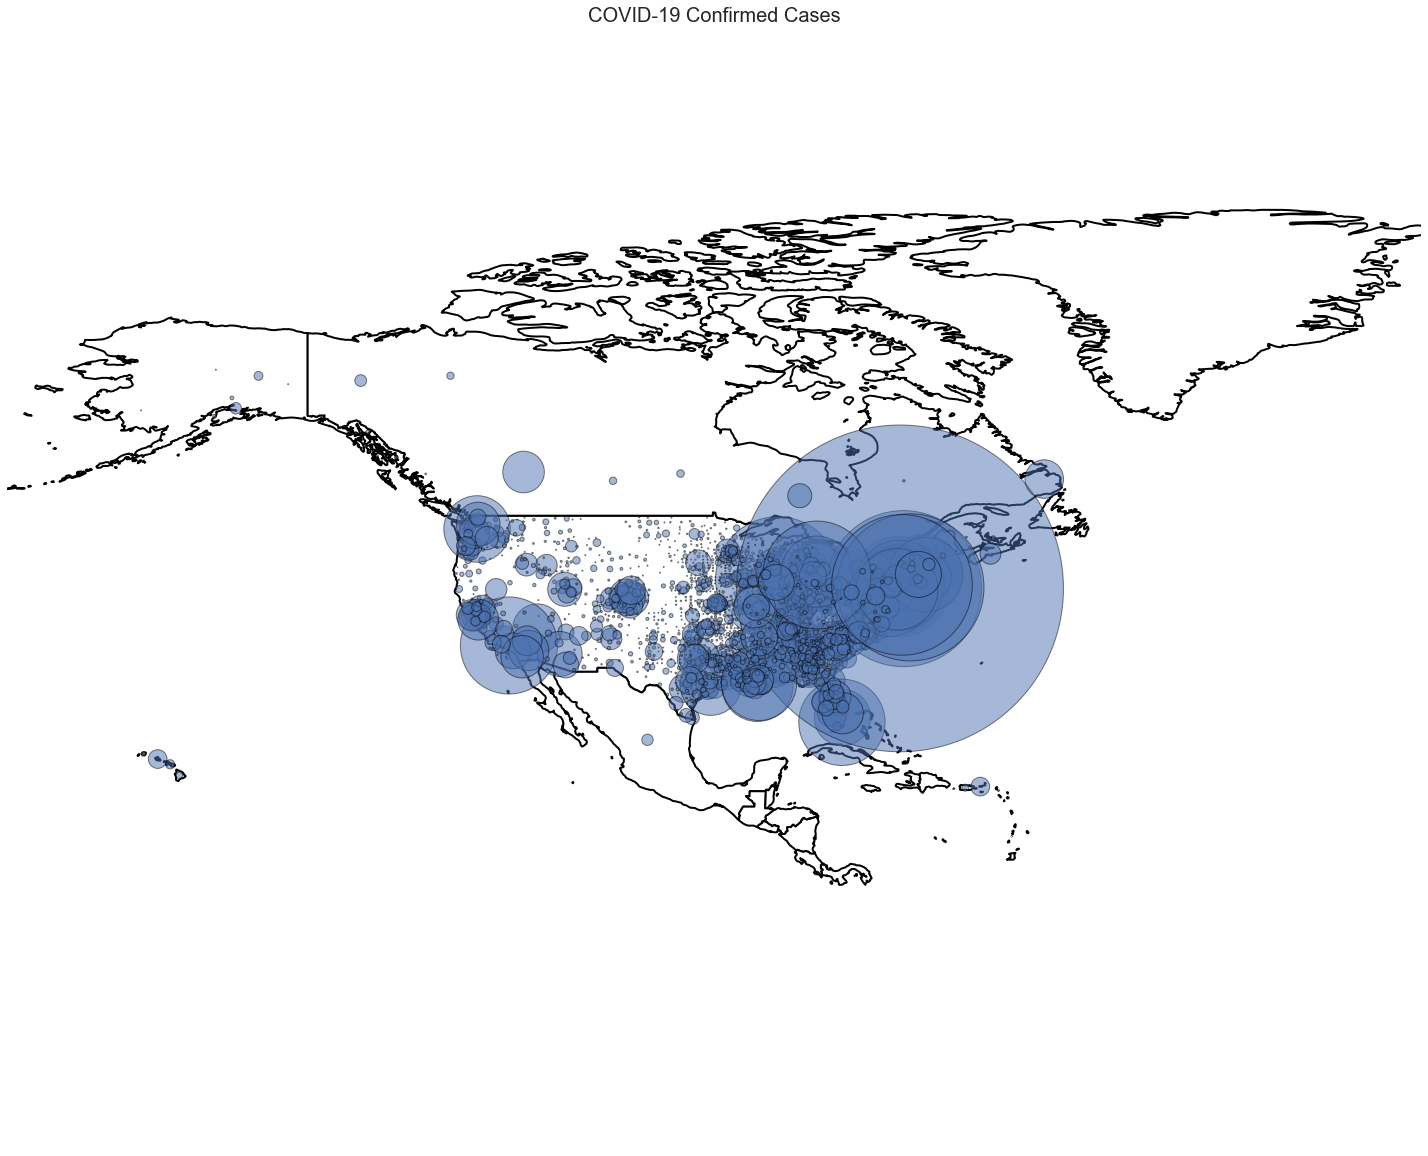

In [79]:
figsize=(20,20)
fig, ax = plt.subplots(figsize=figsize)
base = world_gdf.loc[world_gdf['CONTINENT'] == 'North America'].plot(figsize=figsize, color='white', edgecolor='black', linewidth=2, ax=ax)
ax = world_covid_df.loc[world_covid_df['Country_Region'].isin(['US', 'Canada', 'Mexico'])].plot(markersize=world_covid_df['Confirmed'], edgecolor='black', alpha=0.5, ax=ax)
_ = ax.axis('off')
ax.set_title('COVID-19 Confirmed Cases', fontsize=20)
min_lon=-175; max_lon=-15
ax.set_xlim([min_lon, max_lon])
plt.tight_layout()